# Supervised Machine Learning: SVM Clasiffication

Support Vector Machine (SVM) is a supervised machine learning algorithm capable of performing classification, regression and even outlier detection. The LSVM algorithm will select a line that not only separates the two classes but stays as far away from the closest samples as possible. In fact, the “support vector” in “support vector machine” refers to two position vectors drawn from the origin to the points which dictate the decision boundary.

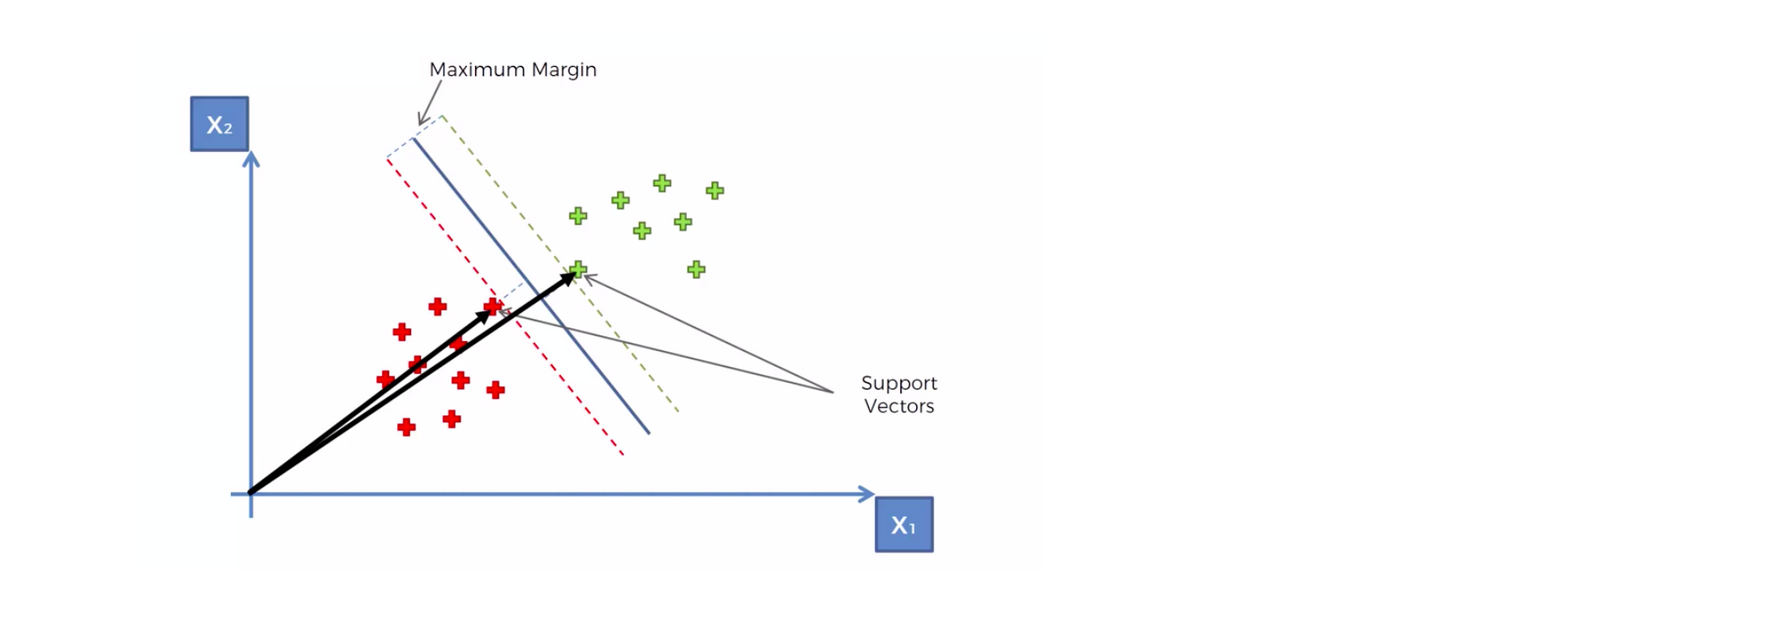

**Advantages**
1. Effective when the number of features is quite large.
2. It works effectively even if the number of features is greater than the number of samples.
3. Non-Linear data can also be classified using customized hyperplanes built by using kernel trick.
4. It is a robust model to solve prediction problems since it maximizes margin.

**Disadvantages**
1. The wrong choice of the kernel can lead to an increase in error percentage.
2. With a greater number of samples, it starts giving poor performances.
3. SVMs have good generalization performance, but they can be extremely slow in the test phase.
4. SVMs have high algorithmic complexity and extensive memory requirements due to the use of quadratic programming.

We have two types of SVM classifiers:

1. **Linear**: data points are expected to be separated by some apparent gap. Therefore, the SVM algorithm predicts a straight hyperplane dividing the two classes. The hyperplane is also called as maximum margin hyperplane.

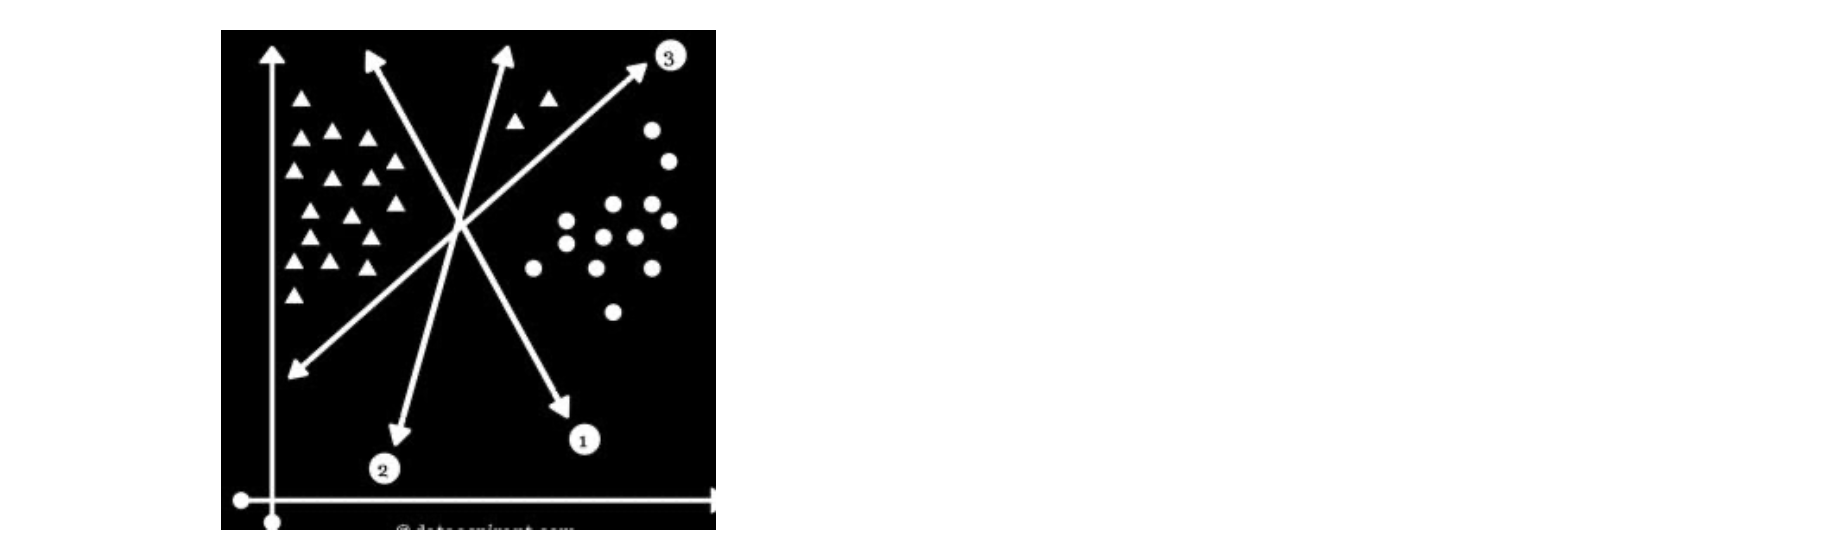

2. **Non-linear**: It is possible that our data points are not linearly separable in a p- dimensional space, but can be linearly separable in a higher dimension. Kernel tricks make it possible to draw nonlinear hyperplanes. Some standard kernels are a) Polynomial Kernel b) RBF kernel(mostly used).

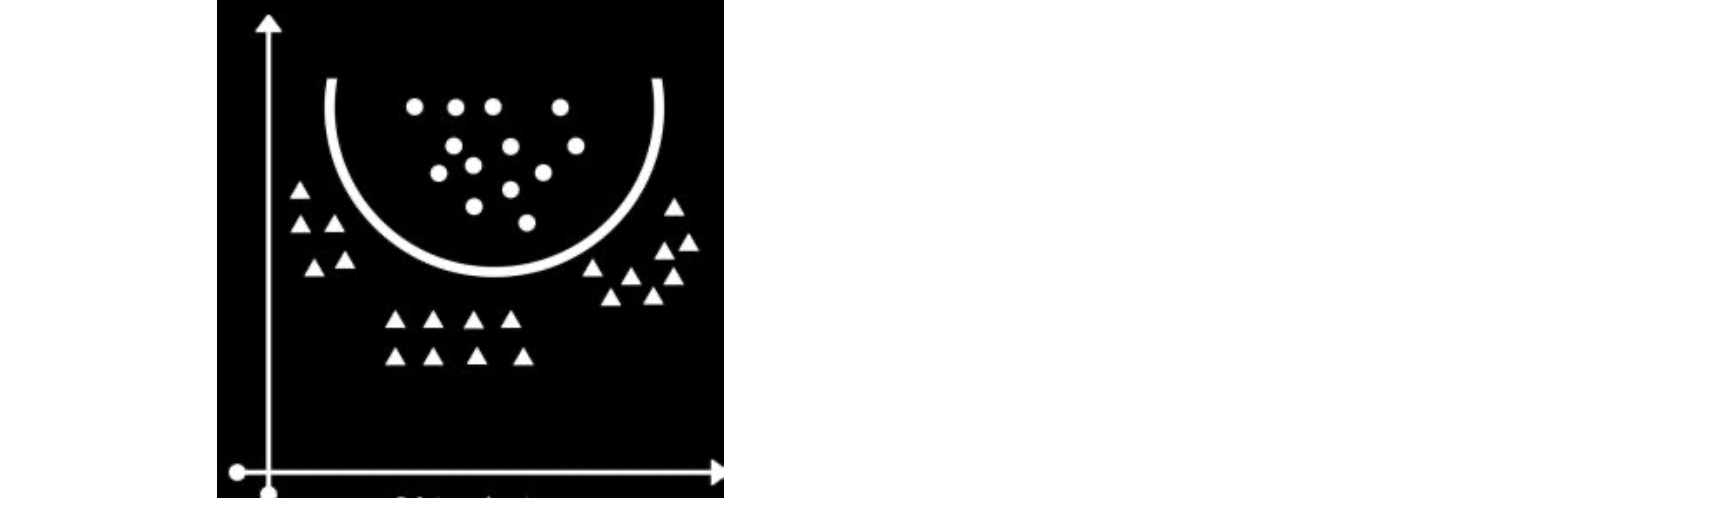

## Linear SVM

In [22]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import svm

In [23]:
X, y = make_blobs(n_samples=250, centers=2,
                  random_state=0, cluster_std=1)

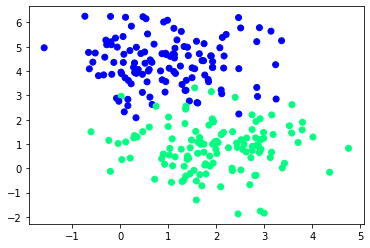

In [24]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [32]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

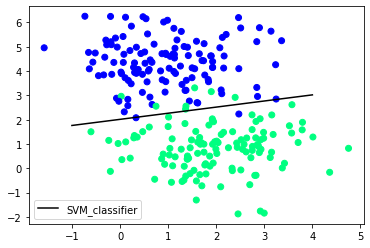

In [33]:
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-1,4)
yy = a * xx - clf.intercept_[0] / w[1]

h0 = plt.plot(xx, yy, 'k-', label="SVM_classifier")
plt.scatter(X[:, 0], X[:, 1], c = y, cmap='winter')
plt.legend()
plt.show()

In [34]:
clf.score(X_test,y_test)

0.9523809523809523

## Non-linear SVM

In [35]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_circles 
from mpl_toolkits.mplot3d import Axes3D 

In [36]:
xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))
np.random.seed(0)
X = np.random.randn(300, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

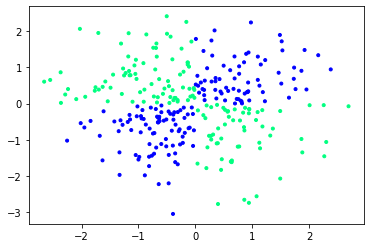

In [37]:
plt.scatter(X[:, 0], X[:, 1], c = Y, marker = '.', cmap='winter') 
plt.show() 

In [38]:
# fit the model
clf = svm.NuSVC(gamma='auto')
clf.fit(X, Y)

NuSVC(gamma='auto')

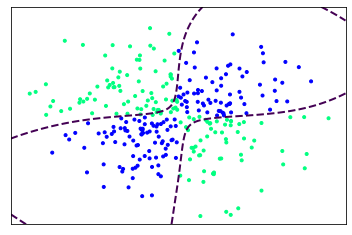

In [44]:
# plot the decision function for each datapoint on the grid
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2, linestyles='dashed')

plt.scatter(X[:, 0], X[:, 1], c = Y, marker = '.', cmap='winter')
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()